In [1]:
# Kütüphaneleri yüklüyorum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb


In [2]:
# Verisetinin yüklenmesi

from google.colab import files
files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [3]:
# Verisetini hafızaya alıyorum
# Verisetinin ilk 5 satırının inceliyorum

data = pd.read_csv("insurance.csv")

print("The first 5 rows if data are:\n", data.head())
print("\n")
print("The (Row,Column) is:\n", data.shape)
print("\n")
print("Data type of each column:\n", data.dtypes)
print("\n")
print("The number of null values in each column are:\n", data.isnull().sum())
print("\n")
print("Numeric summary:\n", data.describe())

The first 5 rows if data are:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The (Row,Column) is:
 (1338, 7)


Data type of each column:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The number of null values in each column are:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Numeric summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14

In [5]:
# Sayısal(sürekli) ve kategorik değişkenleri ayırıyorum
def categorical_variable(data):
    return list(data.select_dtypes(include = ['category', 'object']))

def numerical_variable(data):
    return list(data.select_dtypes(exclude = ['category', 'object']))

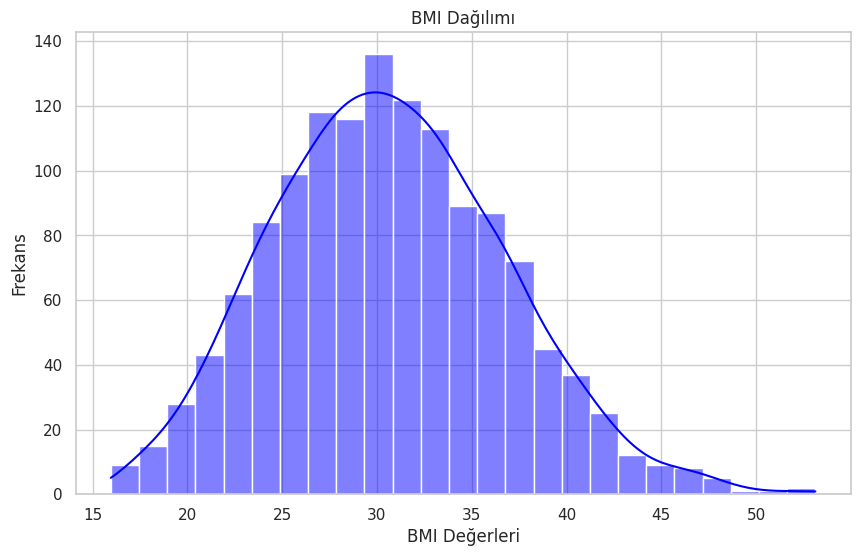

In [6]:
# BMI değerlerinin nasıl bir dağılıma sahip olduğunu gözlemliyorum

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data["bmi"], kde=True, color="blue")
plt.title("BMI Dağılımı")
plt.xlabel("BMI Değerleri")
plt.ylabel("Frekans")
plt.show()

# BMI değerleri Normal(Gauss) dağılıma sahiptir

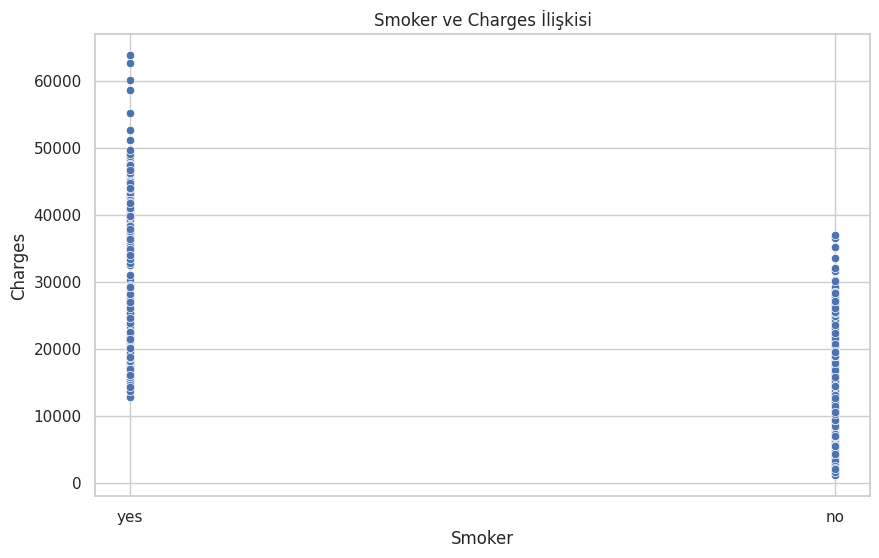

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [7]:
# Smoker ve Charges özellikleri arasındaki ilişkiyi gözlemliyorum
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="smoker", y="charges")
plt.title("Smoker ve Charges İlişkisi")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

charges_by_smoker = data.groupby("smoker")["charges"].mean()

print(charges_by_smoker)

# Smoker = yes olanların charges değerleri ortalamada smoker = no olanlara göre 4 kat fazla çıkacaktır
# Bu da smoker'ın output üzerinde önemli bir etkisi olduğunun göstergesidir

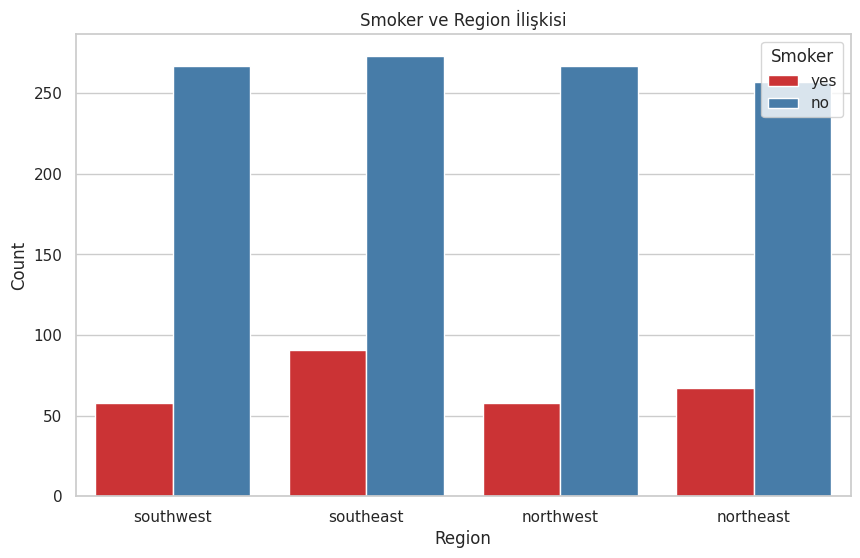

In [8]:
# Smoker ve region sütunları arasındaki ilişkiyi gözlemliyorum

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="region", hue="smoker", palette="Set1")
plt.title("Smoker ve Region İlişkisi")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker", loc="upper right")
plt.show()

# Görüleceği üzere 4 adet bölge için neredeyse eşit sayıda sigara tüketen kişi sayısı mevcuttur
# Böylece region'un output üzerinde önemli bir etkisinin olmadığını anlıyorum

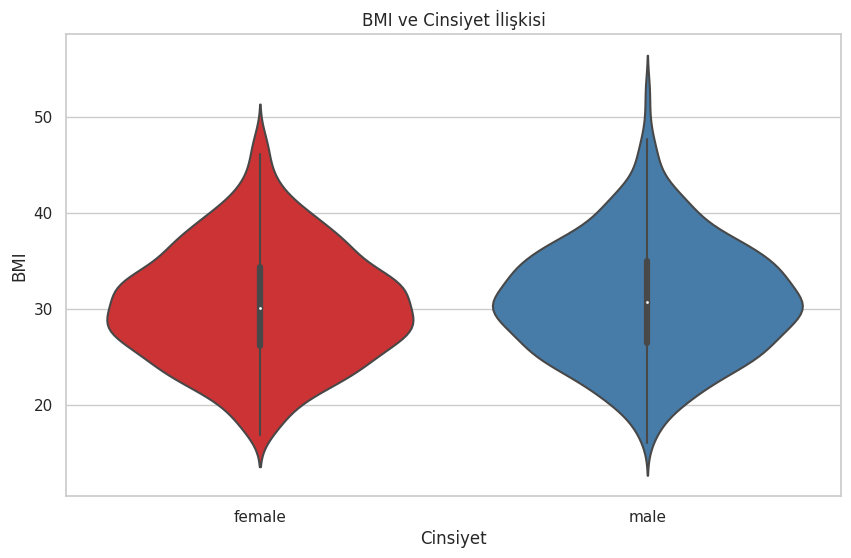

In [9]:
# BMI ve sex sütunları arasındaki ilişkiyi gözlemliyorum
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="sex", y="bmi", palette="Set1")
plt.title("BMI ve Cinsiyet İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("BMI")
plt.show()

# Görüleceği üzere vücut kütle endeksi, iki cinsiyet için de 30 civarında yoğundur.
# Erkeklerde bu endeks değerinin üst sınırı 60'a kadar yaklaşabilmekteyken kadınlarda 50'yi nadiren ve az bir farkla geçebilmektedir

In [10]:
# Bölgelere göre çocuk sayısının dağılımını buluyorum
children_by_region = data.groupby("region")["children"].sum()
print(f"Bölgelere göre çocuk sayıları: {children_by_region}.")

# En fazla çocuk sayısına sahip bölgenin tespiti
most_children_region = children_by_region.idxmax()

# Tespit edilen bölgede kaç çocuk var
children_number = children_by_region.max()

print(f"En fazla çocuk sayısına sahip bölge: {most_children_region}, o bölgedeki çocuk sayısı: {children_number}.")

Bölgelere göre çocuk sayıları: region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64.
En fazla çocuk sayısına sahip bölge: southeast, o bölgedeki çocuk sayısı: 382.


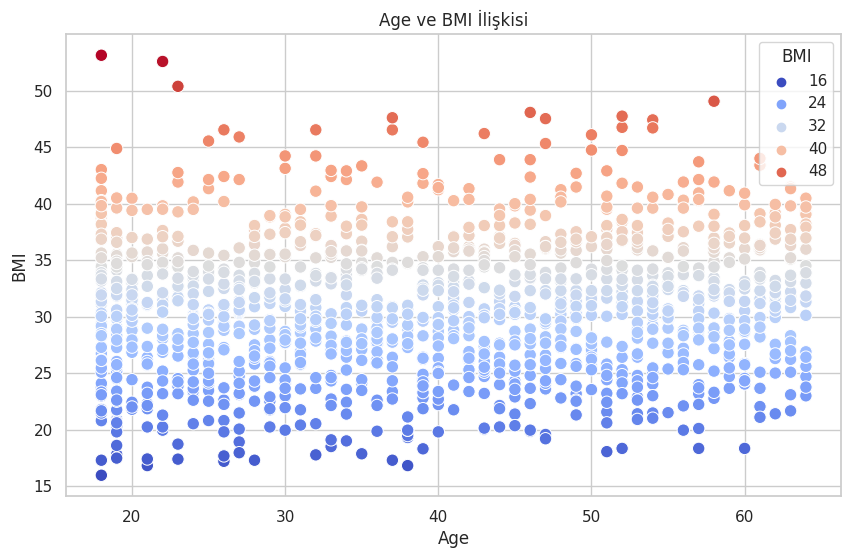

In [11]:
# Age ve bmi sütunları arasındaki ilişkiyi gözlemliyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="age", y="bmi", hue="bmi", palette="coolwarm", s=80)
plt.title("Age ve BMI İlişkisi")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="BMI")
plt.show()

# Görüleceği üzere yaş ile kütle endeksi arasında belirgin bir ilişki yoktur. Her yaş grubu, insan bünyesinin elverdiği aralıktaki her kütle endeks değerine sahip olabilir

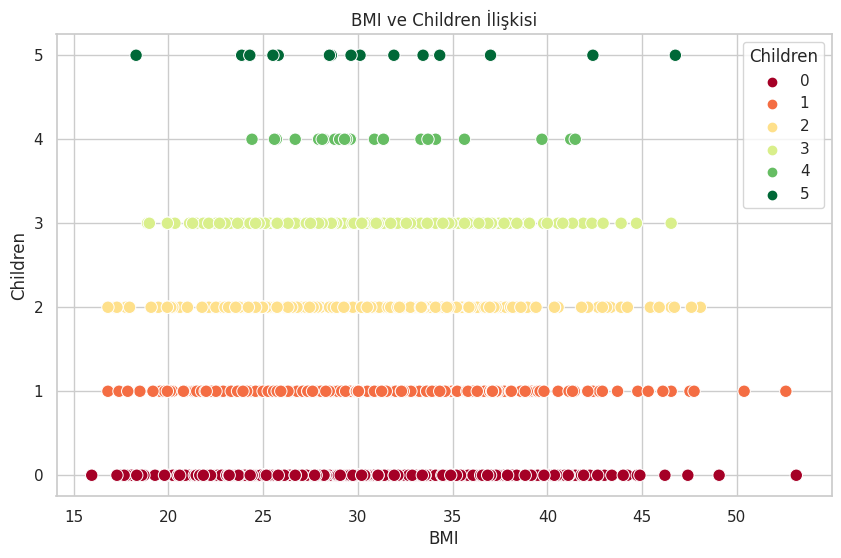

In [12]:
# BMI ve children sütunları arasındaki ilişkiyi gözlemliyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="bmi", y="children", hue="children", palette="RdYlGn", s=80)
plt.title("BMI ve Children İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Children")
plt.legend(title="Children")
plt.show()

# Görüleceği üzere çocuk sayısının tek başına kütle endeksi ile belirgin bir ilişkisi olduğu söylenemez.
# Çünkü vücut kütle endeksi daha çok kişinin yaşam tarzına bağlıdır(obez yaşam veya fit yaşam)

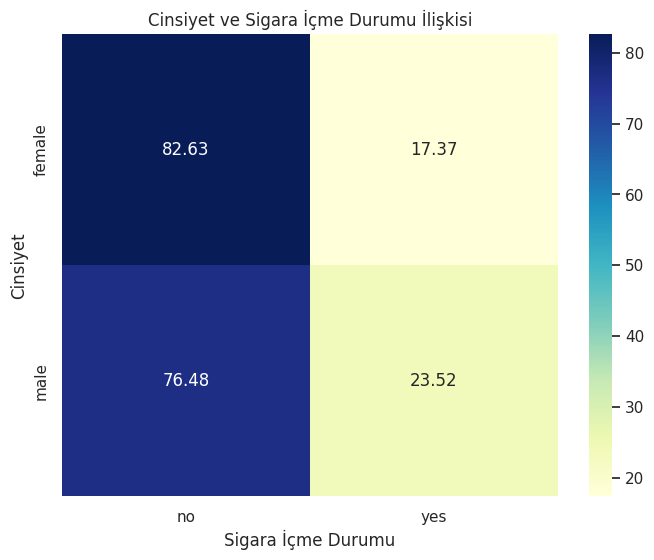

In [13]:
# Cinsiyet ile sigara içicisi olma arasındaki ilişkiyi gözlemliyorum

# Cinsiyet ve sigara içme durumuna göre sayıları içeren bir crosstab oluşturdum
crosstab = pd.crosstab(data['sex'], data['smoker'])

# Yüzdelik bazda göstermek için crostab verilerini normalize ettim
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Heatmap ile ilişkiyi görselleştirdim
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_norm, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cinsiyet ve Sigara İçme Durumu İlişkisi')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Cinsiyet')
plt.show()

# Görüleceği üzere erkeklerde sigara içme oranı daha fazla, bu da erkeklerin sağlık masraflarının kadınlara göre daha çok olmasının nedenidir.
# Bu da cinsiyetin output üzerinde çok ciddi olmasa da bir etkisinin olduğunu göstermektedir

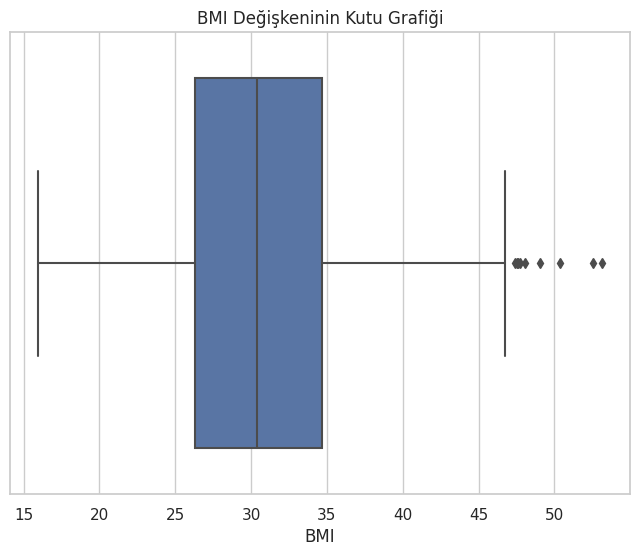

In [14]:
# BMI değişkeninin kutu grafiğini çizdiriyorum ve outlier değer var mı kontrol ediyorum

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='bmi')
plt.title('BMI Değişkeninin Kutu Grafiği')
plt.xlabel('BMI')
plt.show()

# Evet bmi'de aykırı değerler var ama bmi'nin charges'a önemli bir etkisi olduğunu düşünmüyorum o yüzden ayıklama yapmayacağım.

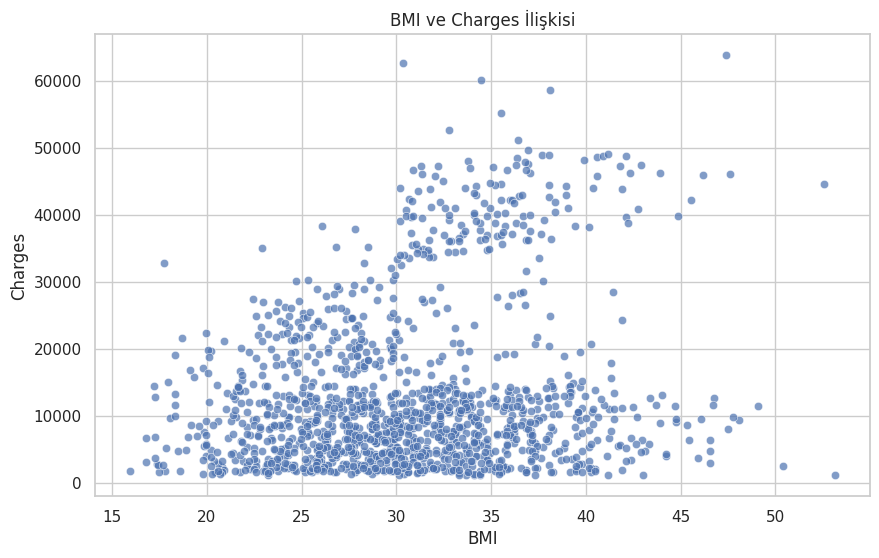

In [15]:
# Scatter plot ile "bmi" ve "charges" değişkenleri arasındaki ilişkiyi görselleştiriyorum

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.7)
plt.title('BMI ve Charges İlişkisi')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# BMI ile charges arasındaki ilişki şu şekilde açıklanabilir, ortalama 30-40 arası bmi için charges değerleri en yüksek değerlerini görmüş
# Ama genel olarak incelediğimizde hemen hemen çoğu bmi değeri için her seviyede charges değeri elde edebilmişiz
# Bu da demek oluyor ki bmi ile charges arasında elbette bir ilişki var ama bu ilişki charges'ı aşırı fazla etkileyecek seviyede değildir

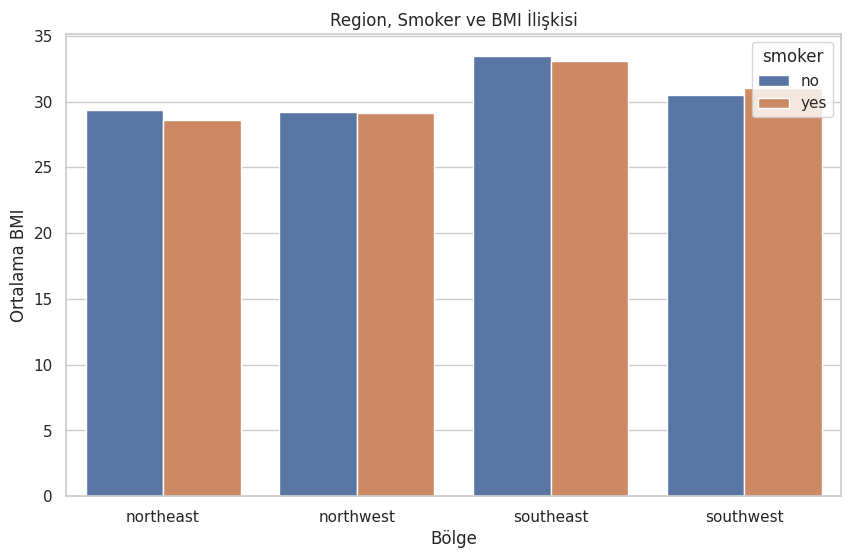

In [16]:
# Verileri gruplayarak ortalama BMI değerlerini hesaplatıyorum
bmi_by_region_smoker = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

# Çubuk grafiğini çizdiriyorum
plt.figure(figsize=(10, 6))
sns.barplot(data=bmi_by_region_smoker, x='region', y='bmi', hue='smoker')
plt.title('Region, Smoker ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('Ortalama BMI')
plt.show()

# Artık buradan da anlıyorum ki sigara içicisi olmanın bölgelere göre sayısal bir ayrım oluşturmuyor ve bmi'ye dikkate değer bir etkisinin olmuyor

In [17]:
# Kategorik verileri sayısal değerlere dönüştürüyorum

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data2 = data.copy()

#cinsiyet
le = LabelEncoder()
le.fit(data2.sex.drop_duplicates())
data2.sex = le.transform(data2.sex)

# sigara içici ya da değil
le.fit(data2.smoker.drop_duplicates())
data2.smoker = le.transform(data2.smoker)

# bölgeler
le.fit(data2.region.drop_duplicates())
data2.region = le.transform(data2.region)

print(data2.head())






   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [18]:
# One Hot Encoding işlemi özellikle nominal kategorik verilerin dönüştürülmesinde sıkça kullanılır.
# Bu yöntemde, her kategori ayrı bir sütun olarak temsil edilir ve her sütunda ilgili kategorinin varlığı veya yokluğu 1 veya 0 ile ifade edilir.

# OneHotEncoder nesnesini oluşturuyorum
onehot_encoder = OneHotEncoder()

# Dönüştürülecek kategorik sütunları seçiyorum
categorical_columns = ['sex', 'smoker', 'region']

# Kategorik sütunları one-hot encoding ile dönüştürüyorum
encoded_features = onehot_encoder.fit_transform(data2[categorical_columns]).toarray()

# One-hot encoding sonuçlarını bir DataFrame'e dönüştürüyorum
encoded_df = pd.DataFrame(encoded_features, columns= onehot_encoder.get_feature_names_out(categorical_columns))

# Veriseti ile birleştiriyorum
data2_encoded = pd.concat([data2, encoded_df], axis=1)

# Dönüşüm sonrası gereksiz sütunları kaldırıyorum
data2_encoded.drop(categorical_columns, axis=1, inplace=True)

# Veriyi daha kısa bir ismi olsun diye data3 değişkenine aktarıyorum
data3 = data2_encoded.copy()

print(data3.head())

   age     bmi  children      charges  sex_0  sex_1  smoker_0  smoker_1  \
0   19  27.900         0  16884.92400    1.0    0.0       0.0       1.0   
1   18  33.770         1   1725.55230    0.0    1.0       1.0       0.0   
2   28  33.000         3   4449.46200    0.0    1.0       1.0       0.0   
3   33  22.705         0  21984.47061    0.0    1.0       1.0       0.0   
4   32  28.880         0   3866.85520    0.0    1.0       1.0       0.0   

   region_0  region_1  region_2  region_3  
0       0.0       0.0       0.0       1.0  
1       0.0       0.0       1.0       0.0  
2       0.0       0.0       1.0       0.0  
3       0.0       1.0       0.0       0.0  
4       0.0       1.0       0.0       0.0  


In [19]:
# Korelasyon matrisini inceliyorum

correlation_matrix = data3.corr()
charges_correlation = correlation_matrix['charges']  # 'charges' sütunuyla olan korelasyonu çıkarın
print(charges_correlation)

# Görüldüğü üzere yorumlarımda haklı çıktım ve charges'a en çok etki smoker'dan geliyor. Özellikle region ve children'ın etkisi çok çok düşük
# Age'in etkisi çok olmasa da yine fena değil, bmi de daha önce söylediğim gibi etkisi var ama aşırı etkileyecek bir seviyede değil
# Yani çıktıyı en çok etki eden smoker durumudur olarak ifade ediyorum

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
sex_0      -0.057292
sex_1       0.057292
smoker_0   -0.787251
smoker_1    0.787251
region_0    0.006349
region_1   -0.039905
region_2    0.073982
region_3   -0.043210
Name: charges, dtype: float64


In [20]:
# Veri setini eğitim için hazırlayorum ve output'u ayırıyorum

y = data3['charges']
X = data3.drop(['charges'], axis=1)

# Veriyi eğitim ve test kümelerine ayırıyorum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluşturuyorum
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    ExtraTreeRegressor(random_state=42),
    xgb.XGBRegressor(n_estimators=100, random_state=42)
]

# Modelleri eğitiyorum ve performansı değerlendiriyorum
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Model: {model.__class__.__name__}")
    print("R² Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("-" * 30)

# Göreceğimiz üzere farklı regresyon modelleri için güzel denebilecek R2 skorları elde ettim
# En iyi sonucu GradientBoostingRegressor modeli için sağladım
# Üç farklı hata metriğini de gözlemledim ve bana göre bu çalışma için MAE ya da RMSE metriklerini kullanmak daha mantıklı geliyor


Model: LinearRegression
R² Score: 0.7835929767120723
Mean Absolute Error: 4181.194473753643
Mean Squared Error: 33596915.85136146
Root Mean Squared Error: 5796.2846592762735
------------------------------
Model: Lasso
R² Score: 0.7835348987579266
Mean Absolute Error: 4182.297003584162
Mean Squared Error: 33605932.380070224
Root Mean Squared Error: 5797.062392287168
------------------------------
Model: Ridge
R² Score: 0.7834446266673823
Mean Absolute Error: 4187.302782980897
Mean Squared Error: 33619947.007616326
Root Mean Squared Error: 5798.271036060347
------------------------------
Model: ElasticNet
R² Score: 0.542634268386539
Mean Absolute Error: 6382.342463514699
Mean Squared Error: 71005449.66079675
Root Mean Squared Error: 8426.473144845164
------------------------------
Model: GradientBoostingRegressor
R² Score: 0.8792771669587912
Mean Absolute Error: 2405.7538884837604
Mean Squared Error: 18742066.691740826
Root Mean Squared Error: 4329.210862471454
--------------------------